# Exercise (Lab Activity)
# Titanic Dataset
1. Load given dataset. (Customized version of Titanic Dataset)
2. Identify Target
3. Identify and exclude features with too many missing values.  (deck)
4. Fill missing values for “age”. Which technique it to be used?
[**Hint:** Mean, random, mean for men, mean for woman, mean for child or nay other approach (specify). ]
5. How to decide missing values for embark town? ( better discard these rows)
6. Identify features where binary encoding is to be done. (gender, adult_male, alive, alone)
7. Note that embarked and embarked town are same. Discard one.
8. Identify highly corelated or redundant features and exclude these.  (say who and adult male) or adult male and gender, who sounds more informative)
9. Apply one hot encoding on who and embarked.
10. Visualize data and apply normalization / standardization
11. Apply binning to age.  (before normalization)
 **Rule: **
 - age <1 - infant
 - 1-12 - child
 - 13-19 - teenager
 - 19-40 - young
 - 40 -60 - middle-aged
 - age > 60 - old

# 1. Load given dataset. (Customized version of Titanic Dataset)

In [6]:
import pandas as pd 
data = pd.read_csv("dataset/titanic_modified.csv")
data.head()

,sex,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alive,alone
0,male,22.0,1,0,7.2500,Third,man,True,NaN,Southampton,no,False
1,female,38.0,1,0,71.2833,First,woman,False,C,Cherbourg,yes,False
2,female,26.0,0,0,7.9250,Third,woman,False,NaN,Southampton,yes,True
3,female,35.0,1,0,53.1000,First,woman,False,C,Southampton,yes,False
4,male,35.0,0,0,8.0500,Third,man,True,NaN,Southampton,no,True


# 2. Identify Target and separating 

In [101]:
# target = alive 
X = data.drop(["alive"],axis=1)
y  = data.alive

# 3. Identify and exclude features with too many missing values. (deck)

In [102]:
X.info()  # deck has too many missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sex          891 non-null    object 
 1   age          714 non-null    float64
 2   sibsp        891 non-null    int64  
 3   parch        891 non-null    int64  
 4   fare         891 non-null    float64
 5   class        891 non-null    object 
 6   who          891 non-null    object 
 7   adult_male   891 non-null    bool   
 8   deck         203 non-null    object 
 9   embark_town  889 non-null    object 
 10  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(2), object(5)
memory usage: 64.5+ KB


In [103]:
X.drop(["deck"],axis=1,inplace=True)

# 4. Fill missing values for “age”. Which technique it to be used? [Hint: Mean, random, mean for men, mean for woman, mean for child or nay other approach (specify). ]

In [104]:
mean_age = int(X.age.mean()) # mean would be best because mean for men or women we cant chose any it has all people data men and women
# convert it into integer and fill  inplace of  all null values 

In [105]:
X.age = X.age.fillna(mean_age).astype(int)

# 5. How to decide missing values for embark town? ( better discard these rows)

In [106]:
X["embark_town"].isna().sum()  # we can fill null values by filling it with mode but it doesnot depent on our data so better we will discard it

2

In [107]:
X.drop(["embark_town"],axis=1,inplace = True)

# 6. Identify features where binary encoding is to be done. (gender, adult_male, alive, alone)


In [108]:
def category_count(feature):
    return f"has {len(feature.unique())} unqiue item "
print(X.apply(category_count))   # where unique is 2 we can put binary encoding 

sex             has 2 unqiue item 
age            has 71 unqiue item 
sibsp           has 7 unqiue item 
parch           has 7 unqiue item 
fare          has 248 unqiue item 
class           has 3 unqiue item 
who             has 3 unqiue item 
adult_male      has 2 unqiue item 
alone           has 2 unqiue item 
dtype: object


# 7. Note that embarked and embarked town are same. Discard one.


In [109]:
# already done

# 8. Identify highly corelated or redundant features and exclude these. (say who and adult male) or adult male and gender, who sounds more informative)

In [110]:
X.drop(["adult_male"],axis=1,inplace = True)

In [122]:
X

,sex,age,sibsp,parch,fare,class,who,alone
0,male,young,0.125,0.000000,0.014151,Third,man,False
1,female,young,0.125,0.000000,0.139136,First,woman,False
2,female,young,0.000,0.000000,0.015469,Third,woman,True
3,female,young,0.125,0.000000,0.103644,First,woman,False
4,male,young,0.000,0.000000,0.015713,Third,man,True
...,...,...,...,...,...,...,...,...
886,male,young,0.000,0.000000,0.025374,Second,man,True
887,female,teenager,0.000,0.000000,0.058556,First,woman,True
888,female,young,0.125,0.333333,0.045771,Third,woman,False
889,male,young,0.000,0.000000,0.058556,First,man,True


#  9. Apply one hot encoding on who and embarked.


In [112]:
# we have already discard embarked
pd.get_dummies(X["who"],dtype=int)

,child,man,woman
0,0,1,0
1,0,0,1
2,0,0,1
3,0,0,1
4,0,1,0
...,...,...,...
886,0,1,0
887,0,0,1
888,0,0,1
889,0,1,0


# 10. Visualize data and apply normalization / standardization


In [113]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sex     891 non-null    object 
 1   age     891 non-null    int32  
 2   sibsp   891 non-null    int64  
 3   parch   891 non-null    int64  
 4   fare    891 non-null    float64
 5   class   891 non-null    object 
 6   who     891 non-null    object 
 7   alone   891 non-null    bool   
dtypes: bool(1), float64(1), int32(1), int64(2), object(3)
memory usage: 46.2+ KB


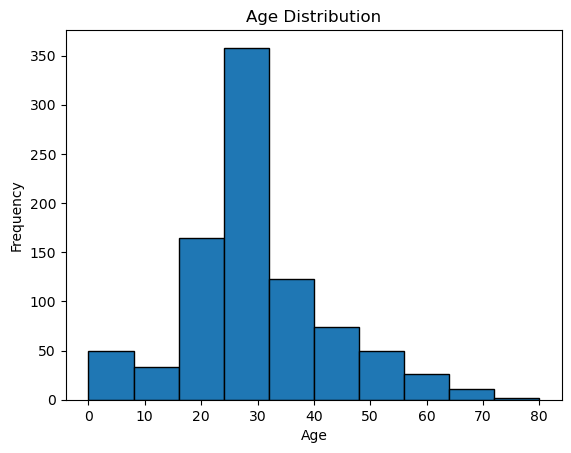

In [114]:
import matplotlib.pyplot as plt

plt.hist(X['age'], bins=10, edgecolor='k')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Applying Standardi
### Rule of thumb
    - If histogram/density plot looks bell-shaped , data follows normal distribution → apply Standardization (StandardScaler)
    - If it's skewed → apply Normalization (MinMaxScaler) or log-transform first.

In [115]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
norm = MinMaxScaler()
# X.age = norm.fit_transform(X[["age"]])  # 2d pr lgta  # first we will apply binning and then this 

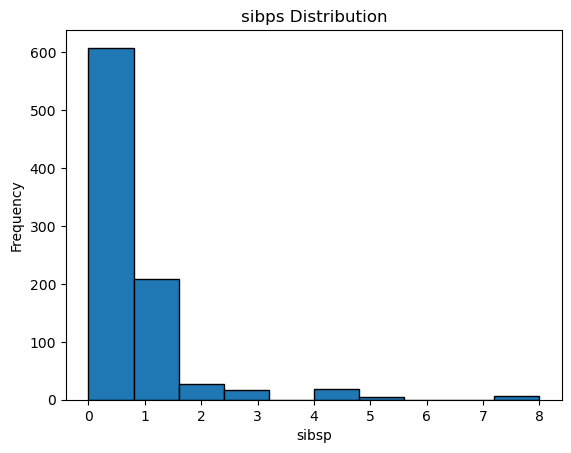

In [116]:
import matplotlib.pyplot as plt

plt.hist(X['sibsp'], bins=10, edgecolor='k')
plt.title("sibps Distribution")
plt.xlabel("sibsp")
plt.ylabel("Frequency")
plt.show()  # normalization 

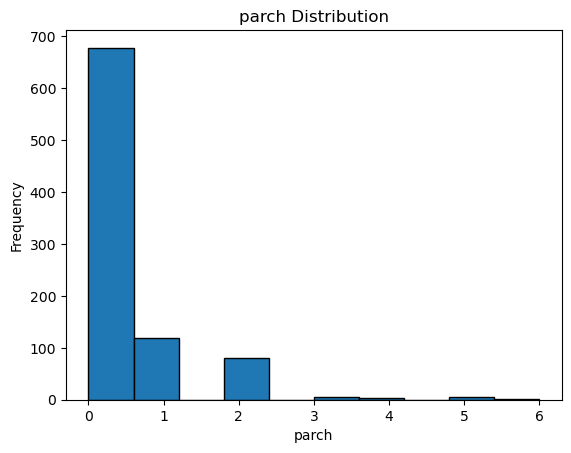

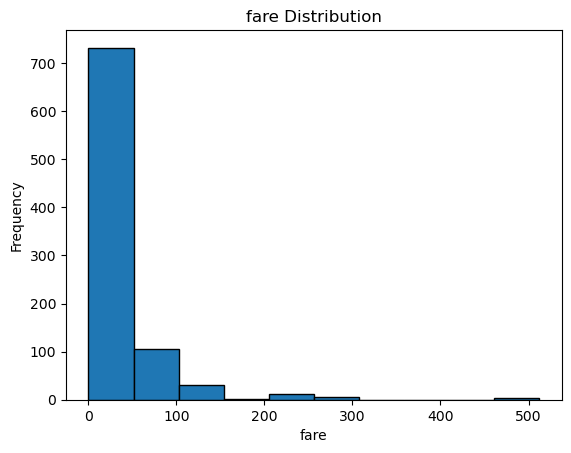

In [117]:
import matplotlib.pyplot as plt

plt.hist(X['parch'], bins=10, edgecolor='k')
plt.title("parch Distribution")
plt.xlabel("parch")
plt.ylabel("Frequency")
plt.show()  # normalizationn
import matplotlib.pyplot as plt

plt.hist(X['fare'], bins=10, edgecolor='k')
plt.title("fare Distribution")
plt.xlabel("fare")
plt.ylabel("Frequency")
plt.show()  # normalization

In [118]:
X.sibsp = norm.fit_transform(X[["sibsp"]]) 
X.parch = norm.fit_transform(X[["parch"]]) 
X.fare = norm.fit_transform(X[["fare"]])  

# 11. Apply binning to age. (before normalization) **Rule: **
    age <1 - infant
    1-12 - child
    13-19 - teenager
    19-40 - young
    40 -60 - middle-aged
    age > 60 - old

In [119]:
bins = [0,1,13,19,40,60,100]
labels = ["infant","child","teenager","young","middleaged","old"]
X.age = pd.cut(X["age"],bins=bins,labels=labels)

In [120]:
pd.get_dummies(X.age,dtype=int)

,infant,child,teenager,young,middleaged,old
0,0,0,0,1,0,0
1,0,0,0,1,0,0
2,0,0,0,1,0,0
3,0,0,0,1,0,0
4,0,0,0,1,0,0
...,...,...,...,...,...,...
886,0,0,0,1,0,0
887,0,0,1,0,0,0
888,0,0,0,1,0,0
889,0,0,0,1,0,0
